<a href="https://colab.research.google.com/github/jgottlieb11/EPS-Goals-Scored/blob/main/EPS_Goals_Scored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install squarify


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import squarify
from bs4 import BeautifulSoup
import requests


In [ ]:
BASE_URL = 'https://en.wikipedia.org/wiki/2021%E2%80%9322_Premier_League'
response = requests.get (BASE_URL)
soup = BeautifulSoup(response.content)


In [ ]:
table = soup.select_one('#League_table') .parent.find_next_sibling('table')

rows = table.find_all('tr') [1:]

team_data = []

for row in rows:
  team_name = row.find('th').text.strip()

  gf = row.find_all('td')[5].text.strip()
  team_data.append({
      'name': team_name,
      'scored': int(gf)
  })


In [ ]:
team_data

[{'name': 'Manchester City (C)', 'scored': 99},
 {'name': 'Liverpool', 'scored': 94},
 {'name': 'Chelsea', 'scored': 76},
 {'name': 'Tottenham Hotspur', 'scored': 69},
 {'name': 'Arsenal', 'scored': 61},
 {'name': 'Manchester United', 'scored': 57},
 {'name': 'West Ham United', 'scored': 60},
 {'name': 'Leicester City', 'scored': 62},
 {'name': 'Brighton & Hove Albion', 'scored': 42},
 {'name': 'Wolverhampton Wanderers', 'scored': 38},
 {'name': 'Newcastle United', 'scored': 44},
 {'name': 'Crystal Palace', 'scored': 50},
 {'name': 'Brentford', 'scored': 48},
 {'name': 'Aston Villa', 'scored': 52},
 {'name': 'Southampton', 'scored': 43},
 {'name': 'Everton', 'scored': 43},
 {'name': 'Leeds United', 'scored': 42},
 {'name': 'Burnley (R)', 'scored': 34},
 {'name': 'Watford (R)', 'scored': 34},
 {'name': 'Norwich City (R)', 'scored': 23}]

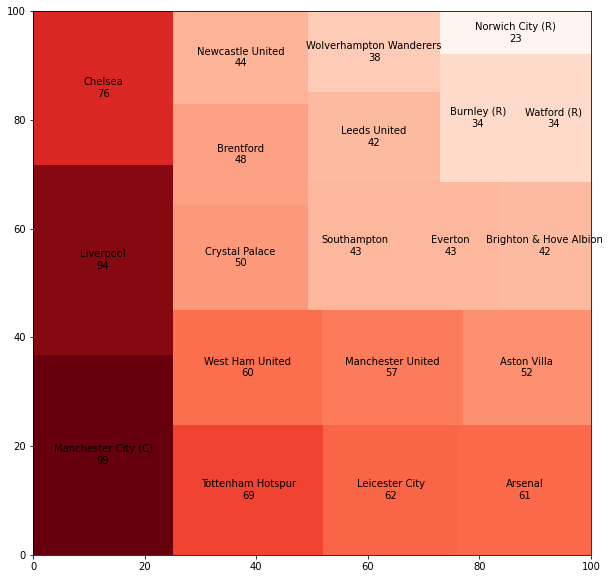

In [ ]:
team_data.sort(key=lambda x: x['scored'], reverse=True)
scored = [team['scored'] for team in team_data]
names = [f"{team['name']}\n{team['scored']}" for team in team_data]

norm = matplotlib.colors.Normalize(vmin=min(scored), vmax=max(scored))
colors = [matplotlib.cm.Reds(norm(value)) for value in scored]

fig, ax = plt.subplots(figsize=(10,10))
squarify.plot(sizes=scored, label = names[:20], color=colors)

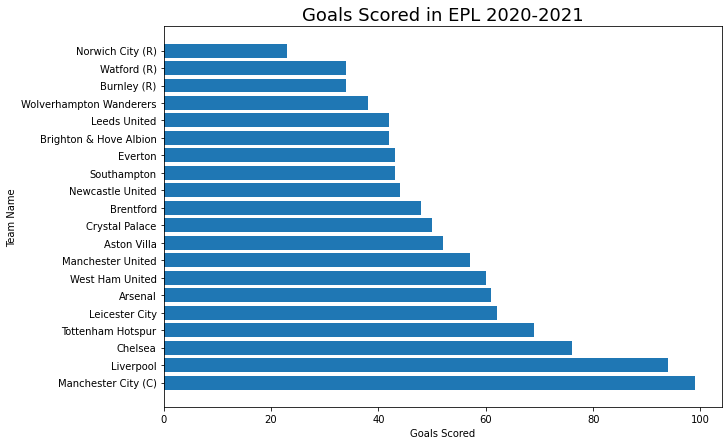

In [ ]:
names = [team['name'] for team in team_data]
fig, ax = plt.subplots(figsize=(10, 7))

plt.barh(y=names, width=scored)
plt.title("Goals Scored in EPL 2021-2022", fontsize =18)
plt.xlabel('Goals Scored')
plt.ylabel('Team Name')
plt.show()